# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%config InlineBackend.figure_format = 'retina'

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
# To reclassify a growing country, passing boundary criteria joinning/moving to developed stage 
names = df[["country"]].copy()
X = df.drop(["country"], axis = 1)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1). Fit a Kmeans Model with Any Number of Clusters

In [4]:
#KMeans?
kmeans = KMeans(n_clusters = 5).fit(X_scaled)
kmeans

C:\Users\Ann Tontiwachw\anaconda3\envs\requirements\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [5]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

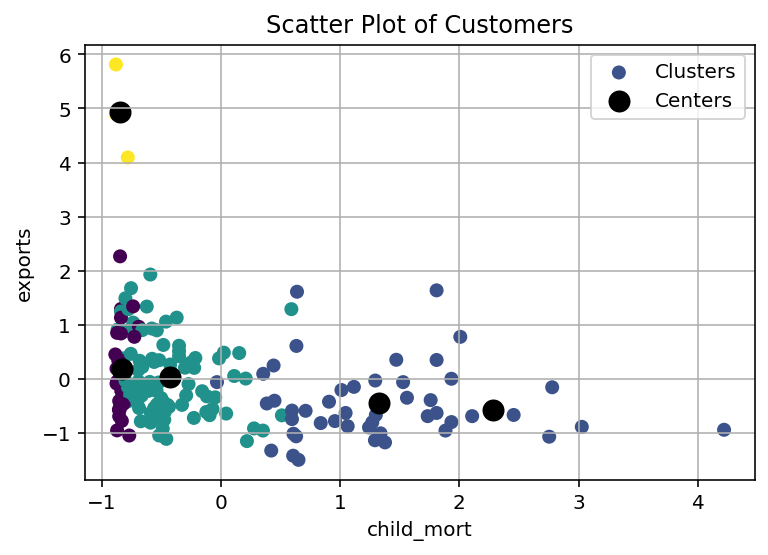

In [6]:
import matplotlib.pyplot as plt

x1_index = 0 # Child Mortality
x2_index = 1 # Export - which we can change numbers here up to 7 features


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [7]:
WCSSs = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random') # n_init = number of times the K algorithm runs
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)
WCSSs # Descending WCSSs Values: the new average values after adding the new centroids? 

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086873,
 700.3229986404375,
 631.8264910931571,
 564.0203792020267,
 513.4905794668628,
 474.8506448694832,
 434.1807585034809,
 397.4049999213736,
 377.1090528335802,
 349.92230807506576,
 343.2802251016897,
 323.4607513038331]

In [8]:
# BONUS OPTIONAL: To write a one line of code
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1, 15)]
WCSSs

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086873,
 700.3229986404375,
 631.6013453646451,
 576.1326256533648,
 510.8315831614807,
 463.0035314885246,
 438.68176011989976,
 397.3458618020584,
 381.23793031466244,
 352.10918398317773,
 341.69344617518914,
 326.18198852080343]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Answer:The economic intuition in choosing number of cluster to be "TWO" is based on the status and the level of economic activities in terms of economic growth, standard of living, GDP-per-Capita. In this case, the above work shows the plot of the "Export Level" and "Child Mortality Rates". These criteria rationalize the justification to split the clusters/countries into: Developed and Developing sub groups.

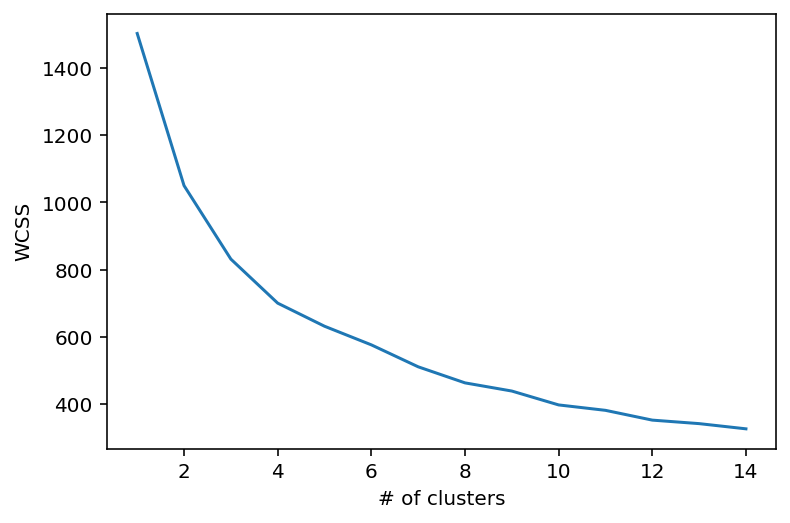

In [10]:
plt.plot(ks, WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

# 6.) Do the same for a silhoutte plot

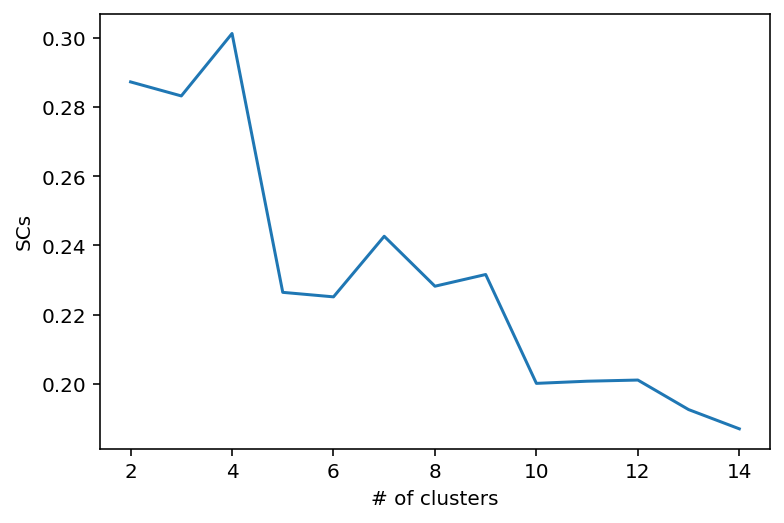

In [13]:
from sklearn.metrics import silhouette_score
SCs = []
ks = range(2, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random') # n_init = number of times the K algorithm runs
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))
plt.plot(ks, SCs)
plt.xlabel("# of clusters")
plt.ylabel("SCs")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled) 
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds, df], axis = 1)
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [15]:
print("Cluster 1: ")
list(output.loc[output[0] == 0, "country"]) # To get country names in cluster = 0

Cluster 1: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [16]:
print("Cluster 2: ")
list(output.loc[output[0] == 1, "country"]) # To get country names in cluster = 1

Cluster 2: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

#### Write an observation
Answer: The above obervations classify countries listed in cluster: 1 (== 0) to be "Developed Countries" following the clustering criteria stated prior. While the ones listed in in cluster: 2 (== 1) are developing ones. The overall living standard measurement metrics (as shown in the cloumns) of countries in the latter cluster are found to be much more concerned. 

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [19]:
output.groupby(0).mean()

C:\Users\steve\AppData\Local\Temp\ipykernel_9980\2649171287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [20]:
output.groupby(0).std()

C:\Users\steve\AppData\Local\Temp\ipykernel_9980\2077230043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

Answer: There are big gaps in the degree of living standard matrix measurements: In terms of child mortality, developed countries shows significantly lower numbers at only 12% relative to 76% for the developing ones. Speaking of quality of living point of views: income / inflation / GDP-per-Capita values meaninigfully differentiate the two clusters, significantly - an average income of 26k per person in developed regions compared to 4k in developing countries. As well as, an inflation of 5.5% relative to 11%.